# Sentiment Analysis on reviews 

- barchart of how many ratings each (1 - 5)
- wordcloud for each rating 1-5
- calculate sentiment score of each rating 1-5, and show the top5 sentiment score
- search engine : we take one keyword from wordcloud and search in review database (to get the review complete story)


# Obtain

In [47]:
# usual analysis packages
import pandas as pd
import seaborn as sns 

# load data
df = pd.read_csv('https://raw.githubusercontent.com/dwihdyn/ds-exploration/main/p3/data/tripadvisor-review.txt')
df.sample(3)

,Review,Rating
5174,"holidays hotel ares eiffel spent nice holidays family beautiful hotel professional staff, suggest visit hotel spent nice holidays,",5
9524,"convenient location nice dining options request quiet room location convenient arriving car make sure good directions alley underground parking garage hard, not kindness stranger spoke spanish assisted amazingly getting car not leaving hotel not sure, foot easy just central plaza, request quiet room upper floor preferably interior, outside hotel revelers revel dawn, madrid, famous destinations prado thyssen palace easy walking distance, dining options hotel nice, breakfast buffet great regret trying dining room dinner 3 nights stayed, value service superior places tried outside hotel, interior room not large pleasant equipped, maid service fine,",4
16065,"wonderful stay stayed hotel 3 days..we 3 families.the rooms washroom clean..pool good size kids wonderful time pool..it spotlessly clean..breakfast dinner lavish spread freaked location fantastic..its heart city..my husband walk park 12 am..singapore safe place..was amazed girls women walking night..in lovely stay,",4


# Scrub

- assumed cleaned from source

# Explore

- barchart of how many ratings each 1-5



<AxesSubplot:xlabel='Rating', ylabel='count'>

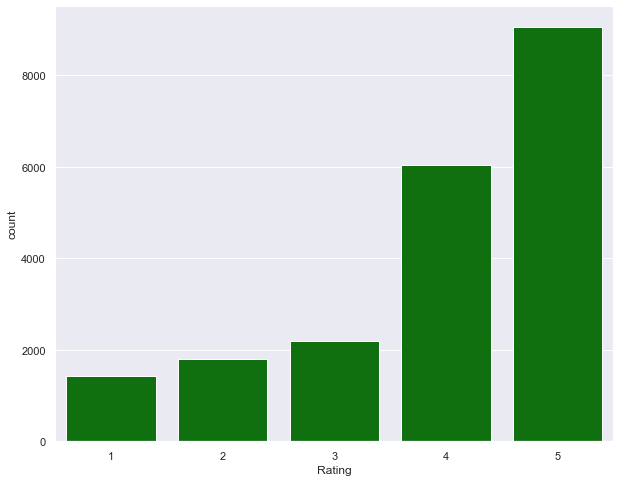

In [48]:
# barplot of each review from 1-5 using sns.countplot

sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data=df, x='Rating', color='green')

# Model

- wordcloud for each rating 1-5 (everytime you rerun the code, words come out at different placement, but same result)
- calculate sentiment score of each rating 1-5, and show the top5 sentiment score
- search engine : we take one keyword from wordcloud and search in review database (to get the review complete story)

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# function to create wordcloud
def wordcloud_generator(data, title=None):
    ''' Input review/description/long text column from dataset, Output wordcloud '''

    # enter data into wordcloud & pre-set the size of plot
    wordcloud = WordCloud(
            width=800,
            height=800,
            background_color='black',
            min_font_size=10
        ).generate(" ".join(data.values))

    # set the plt 'canvas' and plot wordcloud on it
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=30)
    plt.show()    

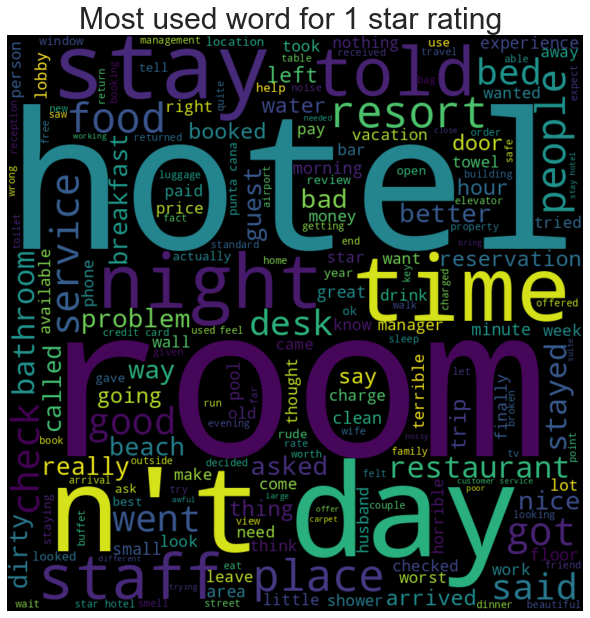

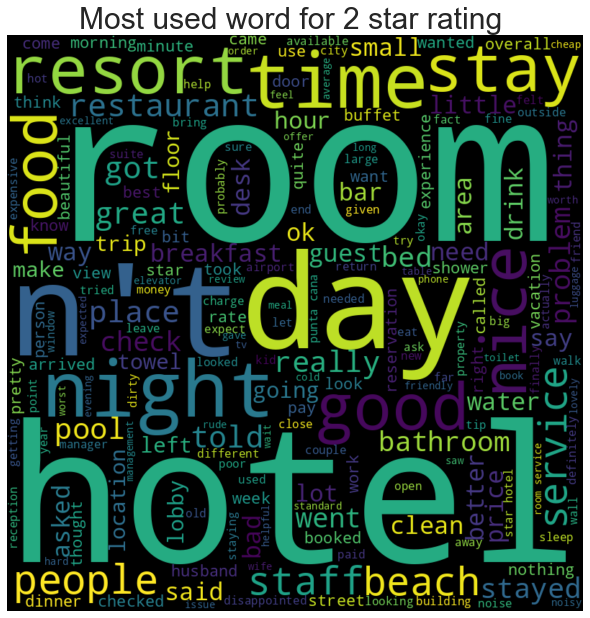

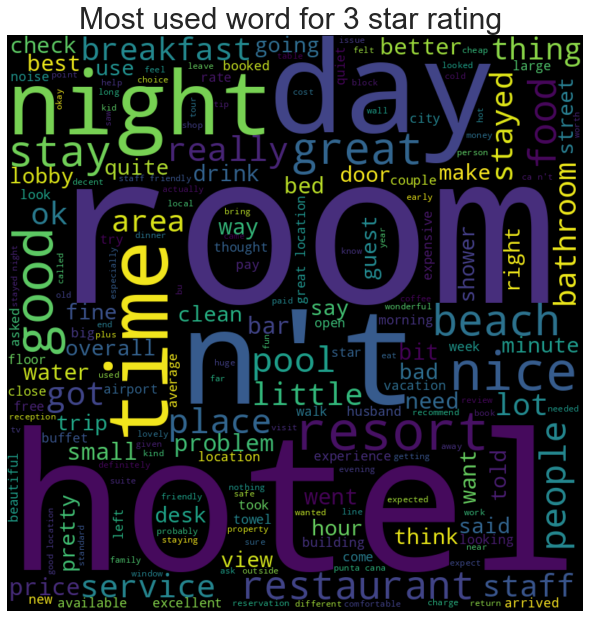

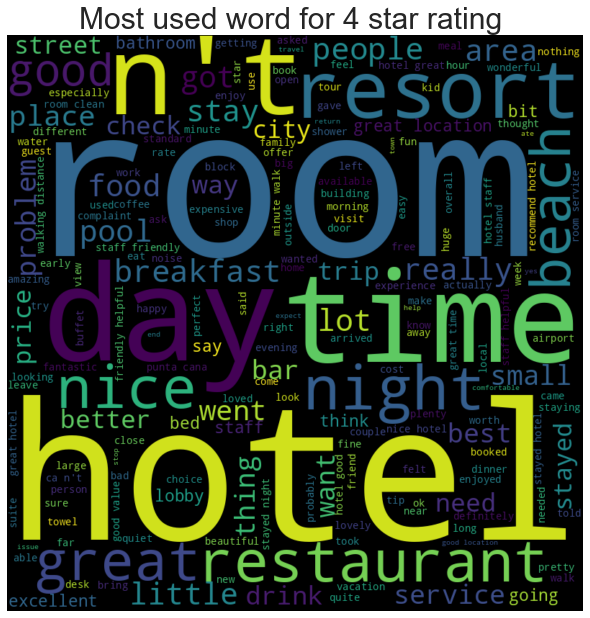

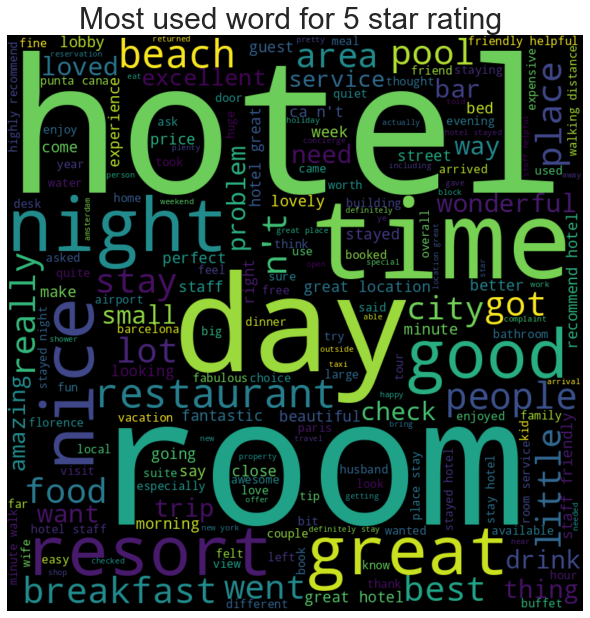

In [50]:
# plot wordcloud by each rating 1-5

min_rating = min(df['Rating'])
max_rating = max(df['Rating'])

for rating in range(min_rating, max_rating + 1):
    reviews_by_rating =  df[df['Rating'] == rating]
    wordcloud_generator(reviews_by_rating['Review'], title=f"Most used word for {rating} star rating ")

### 1 common & 2 interesting words on :

- 1 star : hotel, n't, desk
- 2 star : day, thing, time
- 3 star : street, minute, property
- 4 star : really, great, check
- 5 star : n't , little, great

In [51]:
# sentiment analysis packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# calculate sentiment value for all ratings, using polarity_scores
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(i)['compound'] for i in df['Review']]

# append result to main df
df['Sentiments'] = sentiments
df.sample(3)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dwihadyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Rating,Sentiments
5523,"definition average stayed 1 night catch train day, room floor facing street street noise not issue, hear inside hotel did not sleep, room 105 tiny not big issue night, guessing rooms bigger quieter expensive, check person not friendliest helpful, night desk person spoke english spoke italian friendly, breakfast good dining area nice, location station main draw place considering price probably better,",3,0.7611
15003,"disceiving booked room 3 days, regret husband looked room not pictured web site, size bed kitchenette thing liked, decided stay days, daughters shared size bed, youngest bitten times believed kind little mites fleas noticed bedspread not clean, sprayed lysol did n't work needed flea spray, hard parking come park, stated parking available blocks away, thing did n't enjoy area somewhat bad, staying police searching man stood hotel believe fight, nervous especially children trying nice time, hotel connected green isle owners, thank god 3 days, know time not stay, mango inn feet away nicer place clean, disappointed customer,",2,-0.4744
7922,"ca n't wait return fabulous hotel, staying hotel ca n't imagine staying sf, rooms luxurious despite size hotel think alone.no noise hotel users, enjoy,",5,0.1088


In [52]:
# search engine that input data, output review that is closest (vector location) to the query input by cosine_similarity

def search_engine(query, description_column, key_title_column, sentimentscore_column):
    '''Input search query & description column in the database, output top5 most relevant movies as per search query towards movie descriptions'''
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    # scrub the data from any english stopwords
    tfidf = TfidfVectorizer(stop_words='english')

    # train TfidfVectorizer using movie description
    feature = tfidf.fit_transform(description_column)

    # insert the keyword that we want to search
    query = query

    # transform input into vector that shall be compared which the closest to the movie description
    query_feature = tfidf.transform([query])

    # compare query input to movie descriotion using cosine_similarity method
    cosims = cosine_similarity(query_feature, feature).flatten()

    # get the vector top5 closest to the query
    results = cosims.argsort()[-4 : -1]
        
    # show search result
    for i in results:
        print(key_title_column.iloc[i])
        print(sentimentscore_column.iloc[i])
        print(description_column.iloc[i])
        print('------')

# iNterpret

- show top3 :
    - least sentiment, but they give 5 star
    - highest sentiment, but they give 1 star
- interpret search engine output of different keyword

In [53]:
# show top3 least sentiment, but they give 5 star

pd.set_option('display.max_colwidth', None)
df[(df['Rating'] == 5) & (df['Sentiments'] < 0)].sort_values("Sentiments")[0:3]

,Review,Rating,Sentiments
3613,"fabulous, booking vacation 4 dismay realized punta cana not mexico, frantically searched information possibly iberostar punta cana, tripadvisor helpful reading personal reviews experiences nervous wreck, apprehension arrived 12/5/03, arrival airport flights arriving time orderly fashion went quickly, check went wanted king sized beds none available till day, no problem, grounds absolutely beautifull maintained, entire resort practically spotless, people work hard cleaning areas resort, met unfriendly worker, bent backward accomodate reason course, food aplenty satisfy tastebuds, types activity spanish lessons dancing arobics, did nothing relax eat drink dance alittle night, no group got sick brushed teeth spigot water, believe moderation probably key, rooms clean no trouble whatsoever housekeeping, wonder people wrote negative remarks place stayed sameplace did, thing upset trip did not book weeks, heart beat,",5,-0.9677
7143,"wonderful 10 year anniversay went secrets feb. 28- mar, 6 2004. read million reviews quite nervous going having bad experience, not happened, beautiful experience, resort beautiful people friendly accommidating, thing wrong, negative review true slowness service restaurants, did bring bug spray use not night walked beach, complaint resort little pet peeve n't cappucino 10:00, like alot earlier really no big deal, resort heart beat try new place, worrying good place, absolutely, email question,",5,-0.9272
13296,"hell argonaut changed planned birthday getaway city husband, stuck work til late night, packed grabbed sleepy kids drove argonaut, husband not eaten breakfast things not going, cranky kids irrate husband prayed hotel nice, tripadvisor took chance, soon dinner 10pm stood line 2 couples germans needed explained, thought worst going, time turn receptionist bit annoyed ordeal, requested room gave key, turned mentioned husband birthday bad start, suggested room 2 queens not satisfactory best comfortable, went room definitely quiet inner court nothing write home, went downstairs asked choices, suggested ocean view king size bed separate pull sofa children, jacuzzi tub, offered room deep discount took, receptionist n't warm fuzzy type person encountered gets a+ trying knowing condition.it luxurious comforter 2 bedroom suite-pocket doors table minibar huge space thousand square feet overlooking alcatraz ocean leopard robes huge jacuzzi tub family fit, 2 kids, husband able sleep luxurious bath, kids plenty running room.i sad leave know time, request upgrade king suite night, btw park beach parking garage, cheaper,",5,-0.9252


In [54]:
# show top3 highest sentiment, but they give 1 star

df[(df['Rating'] == 1) & (df['Sentiments'] > 0)].sort_values("Sentiments", ascending=False)[0:3]

Review  \
17082                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 large personalized service, terrible food terrible service stayed resort christmas holidays december 21 december 28 2007 room 65109. hotel lobby nice clean check went smoothly no hitches, staff polite check, given map, no schedule activities no information booking reservations restaurants, extra things paid package, thank god trip advisor, research.this hotel sections not packages not allowed enjoy amenities, just wander pool area comes tells leave, saw happen guests, instructions check prevent this.ok good things, property property quite nice, landscaping good not breathtaking resort kept clean, big plus given 70 buildings resort 18 rooms, did napkin calculation came 7,000 people resort occupancy christmas period, kept people waiting eat christmas dinner night send folks upgraded premier area just accommodate real nuisance actually paid upgrade.beach beach ocean just beautiful, ocean beautiful nice swim no shells no rocks just beautiful miles white sand, biggest plus vacation, plenty shade beach lounge chair reserve towel 8am morning, real downer vacationers, beach allowed topless lot that.rooms rooms comfortable clean, stayed ambar section upgrade, bed average no westin beds comfortable, air conditioner worked great, bathroom nice clean rain head showers, lighting terrible rooms, say rooms furnishings 3 star level.now areas needing improvement lots food 7,000 people place starts feel like campus instead resort food takes cafeteria quality, food terrible cold, cooks sloppy preparing meals e.g. omelettes, not trust salads lots water pan, food beach better warm, roast chicken burgers fries days, hot items, love pork enjoy dr. lots not bad, wished local food maybe better prepared, cooks not chefs did not clue, food important vacation rule resort, said did sent premier section christmas dinner overflow, food ok guess pay big bucks ok food not great, did visit reserved restaurants just set menu, pre-made just brought fridge table cold plate, none restaurants great french gourmet better tried.service no personalized service, sense employees not happy treated comes service, no really stretches provide good service, polite not necessarily pleasant, examples family friends tried transferred 5-15 minutes connecting room, sleeping night heard sounded like running water, ceiling leaking floor, called desk transferred 4am person spoke said not job__Ç, no came check leak, employees easily tell not job point says, sense employees not really empowered, black family traveling received discriminatory service staff e.g. skipping line taking white folks having waiters come serve table, experienced different points stay, apparently history dark skinned black people dr. 20 black people resort 7000 people strange, did not let spoil holiday not there.getting resort shuttle n't want walk 5-10 minute walk resort especially beach main dining areas, great thing hang getting resort does not huge anymore.nightly shows entertainment staged shows resorts average, tried french cabaret western shows e.g. lion king- course oddly interpreted, like making dinner bunch chefs guests europeans americans, mini-circus night good, better showing latin culture rich vibrant fun, nightly live band does mix imitating western ballads poorly singers reading words performing set staff organize daytime events volleyball dance sing live band dance guests nightclub,

In [56]:
search_engine('street', df['Review'], df['Rating'], df['Sentiments'])

2
-0.8658
avoid street-facing room esp, room 114 husband stayed hotel early january agree reviewers location ideal accommodations generally clean basic street noise ruined stay.our night room 114 overlooks street, husband heavy sleepers did not think twice street noise issue, not midnight crowds street started rowdy, septic truck parked right outside window proceeded septic/sewer filling room unpleasant stink, garbage trucks, street sweepers, morning truck assume glass recycling truck emptying unbelievable number glass filled dumpsters, worst night sleep life.while desk staff did different room street did apology hint regret long sleepless night, far level customer service expected n't know stay hotel,  
------
3
0.5768
good stay quite nice rooms not european standard clean spacious, location quite place close main street nathan street-5min, stay hotel,  
------
5
0.872
fantastic reviews trip advisor spot on.this fantastic hotel 34th street.same street maceys empire state.the rooms cle

In [60]:
search_engine("n't", df['Review'], df['Rating'], df['Sentiments'])


3
0.929
good price, boyfriend stayed riu resort 5 days 4 nights, 5 hotels situated resort stayed naiboa reasonably priced hotels, 2 palace hotels extravagent hotels, naiboa n't nicest hotel lot good hotel 4 minute walk away ocean, not good trip food, really serve buffet food not tasty leave little queasy times, make reservations resteraunts resort finding guy scheduled reservations 7am morning, limited seating n't later likely not able make reservations, highly suggest eating resteraunts buffet possible, staff bilingual helpful speak english, recommend staying naiboa looking reasonably priced place great beach,  
------
1
-0.951
worst experience hotel arrived riu naiboa hotel 06/03/08 assigned room, entering room saw living conditions unfit, room conditions follows mold closet mold bathroom tiles ceiling light fixtures enamel peeled bathroom tub unsanitary twin bed instead double size.i asked different room conditions, entering second room living conditions slightly better mold not gro

In [58]:
search_engine('thing', df['Review'], df['Rating'], df['Sentiments'])

3
0.8261
ok nice location middle city literally door mercato centrale shopping area, hotel clean staff helpful nice, bothering fact walls neighbour makes not mention people walking corridor n't want bathroom early late know going bother breakfast ok. best thing location worst thing noisy,  
------
2
0.9129
better hotels just came omm hotel barcelona quite disappointed, good thing design, staff don__t look eyes, work hospitality smile, called 12.10 following question hi like know time leaving hotel, offensive tone, thing better ways ask guest, good thing spa.really really proffesional polite attentive.for 300___, definetely better hotels,  
------
5
0.7191
good stayed short hotel july 2004 amazed quality service compared charged fee attitude staff, staff extremely polite helpful, negative thing steep stairs staff careful luggage coming going, bad thing small rooms clean modern facilities, really recommend,  
------


## Summary on findings :

- 3 interesting keywords we look into were "street, n't, thing"
    - "street" describe that to not take the street view, and some describe the location of the hotel (at 34th street). avg rating 3.3, sentiment 0.19

    - n't always associated with riu naiboa (hotel in dominican republic). could be a name of place. might need to further investigate what is that. cant be a typo as n't appears way too many times. sample sentences are "....naiboa n't nicest hotel lot good hotel 4 minute walk away ocean...." and "...limited seating n't later likely not able make reservations...". avg rating 1.6, sentiment -0.326

    - "thing" uses by user to compare pros & cons. sample word "..best thing location worst thing noisy.". avg rating 3.3, sentiment 0.82

- theres so many 5 star rating but yet negative sentiment score (and vise versa), and reading the review does reflect better towards review, but its just many many double negative sentences (eg : not bad) could lead to negative sentiment. how can we scrub such data so that sentiment score can be more accurate ?